# Análisis de correlación

Objetivos de la Clase:
* Comprender la Correlación: Definir la correlación y su importancia en el
análisis de datos.
* Calcular y Medir la Correlación: Aprender a utilizar las medidas de
correlación, y aplicar el método DataFrame.corr() de Pandas para calcular la
matriz de correlación.
* Manipular y Visualizar Datos: crear visualizaciones de correlaciones
utilizando Seaborn, como mapas de calor y diagramas de dispersión.

In [37]:
# Importamos librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Creamos un dataframe de prueba
data = {
    "Altura_cm": [160, 165, 170, 175, 180],
    "Peso_kg": [55, 58, 65, 70, 75],
    "Grasa_%": [28, 25, 22, 20, 18]  # decrece con la altura y el peso
}
df = pd.DataFrame(data)
print("Dataset:")
df

Dataset:


,Altura_cm,Peso_kg,Grasa_%
0,160,55,28
1,165,58,25
2,170,65,22
3,175,70,20
4,180,75,18


In [39]:
# Variables estadísticas
df.describe()

,Altura_cm,Peso_kg,Grasa_%
count,5.000000,5.000000,5.000000
mean,170.000000,64.600000,22.600000
std,7.905694,8.264381,3.974921
min,160.000000,55.000000,18.000000
25%,165.000000,58.000000,20.000000
50%,170.000000,65.000000,22.000000
75%,175.000000,70.000000,25.000000
max,180.000000,75.000000,28.000000


<Axes: ylabel='Peso_kg'>

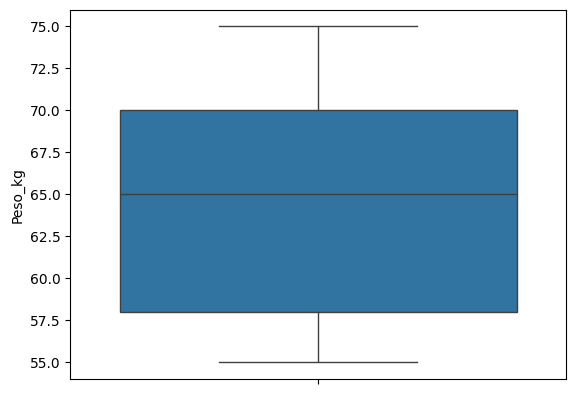

In [40]:
sns.boxplot(data=df, y="Peso_kg")

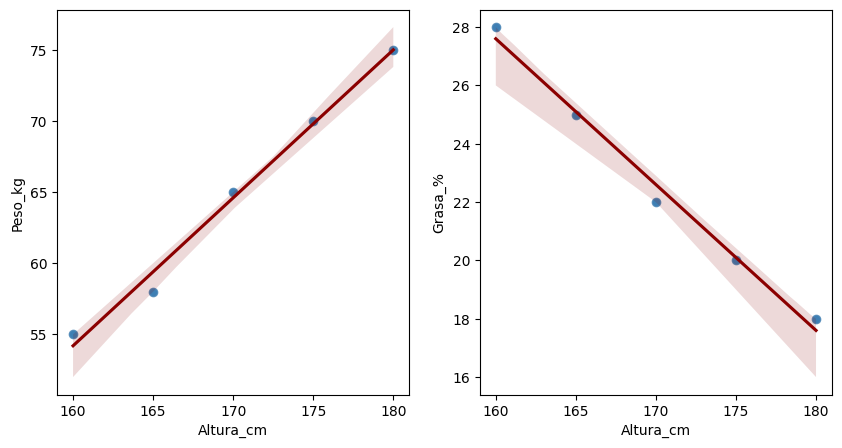

In [41]:
# Representamos las variables en un scatterplot o gráfico de dispersión

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Altura_cm", y="Peso_kg")

sns.regplot(
    data=df,
    x="Altura_cm",
    y="Peso_kg",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="Altura_cm", y="Grasa_%")
sns.regplot(
    data=df,
    x="Altura_cm",
    y="Grasa_%",
    color="steelblue",
    line_kws={"color": "darkred", "label": "Recta de regresión"}
)


plt.show()

# Covarianza

La covarianza mide la existencia de asociación lineal entre dos variables; es decir, si el comportamiento de las variables se mueve en la misma dirección o en direcciones opuestas.
<BR>
Se calcula de la siguiente manera:
<BR>
cov(X, Y) = (sum (x - mean(X)) (y - mean(Y)) ) / (n-1)

In [42]:
# A partir de la fórmula, calculamos la covarianza entre Peso_kg y la Altura_cm
cov_xy = ((df["Peso_kg"] - df["Peso_kg"].mean()) *
          (df["Altura_cm"] - df["Altura_cm"].mean())).sum() / (df["Altura_cm"].count() - 1)
cov_xy

np.float64(65.0)

In [43]:
# O bien podemos usar el método de pandas cov de la siguiente manera:
df["Altura_cm"].cov(df["Peso_kg"])


np.float64(65.0)

Agregar la variable Grasa_% al dataset y analizar el comportamiento Altura_cm Vs Grasa_%

In [44]:
# Y que sucede entre la Altura_cm y la Grasa_%
df["Altura_cm"].cov(df["Grasa_%"])


np.float64(-31.249999999999996)

## Interpretación

* Una covarianza positiva indica que ambas variables se mueven la
misma dirección (ambas crecen o ambas decrecen).

* Una covarianza negativa indica que las variables se mueven en direcciones opuestas (cuando una crece, la otra decrece).

* Una covarianza nula indica que no hay una relación lineal entre las variables. En este caso se dice que las variables son no correlacionadas.

Cuidado: la magnitud de la covarianza depende de las unidades (no está normalizada). Por eso no podemos comparar covarianzas de variables en distintas escalas

Analicemos:
* El signo de las covarianzas nos indican en que sentido se mueven las variables, pero: ¿cómo podemos determinar el grado de asociación lineal entre las variables, es decir que tan relacionadas están???

# Correlación: fuerza de la asociación lineal


Dadas dos muestras:
* X = (x1, x2, x3, ..., xn)
* Y = (y1, y2, y3, ..., yn)
<BR>
Se define el Coeficiente de Correlación de Pearson como:

Corr(X,Y) = Cov(X,Y) / (sX * sY)

donde:
* Corr(X,Y): es el coeficiente de correlación de Pearson
* Cov(X,Y): es la covarianza entre X e Y
* sX: es el desvío standard de X
* sY: es el desvío standard de Y


Interpretación:

La correlación toma valores en el intervalo [−1, 1].
* Corr(X, Y) = 1 indica una relación lineal directa perfecta, donde los datos están sobre una recta de pendiente positiva.
* Corr(X, Y ) = -1 indica una relación lineal inversa perfecta, donde los datos están sobre una recta de pendiente negativa.
* Corr(X, Y ) = 0 indica que no existe una relación lineal entre los datos.


En particular:
* 0 ≤ |Corr(X, Y )| ≤ 0.25 =⇒ No hay relación lineal
* 0.25 < |Corr(X, Y )| ≤ 0.50 =⇒ La relación lineal es débil
* 0.50 < |Corr(X, Y )| ≤ 0.75 =⇒ La relación lineal es moderada
* 0.75 < |Corr(X, Y )| ≤ 1 =⇒ La relación lineal es fuerte

In [45]:
# Calculemos la correlación entre Altura_cm y el Peso_kg
df["Altura_cm"].corr(df["Peso_kg"])

np.float64(0.9948623513313952)

In [46]:
# Calculemos la correlación entre Altura_cm y la Grasa_%
df["Altura_cm"].corr(df["Grasa_%"])

np.float64(-0.9944466052196625)

## Matríz de correlación

In [47]:
# Calculamos la matriz de correlación para el Dataframe df
corr_matrix = df.corr()
corr_matrix

,Altura_cm,Peso_kg,Grasa_%
Altura_cm,1.000000,0.994862,-0.994447
Peso_kg,0.994862,1.000000,-0.987815
Grasa_%,-0.994447,-0.987815,1.000000


In [48]:
# O bien podemos extraer las variables que nos interesan y realizar gráficos separados


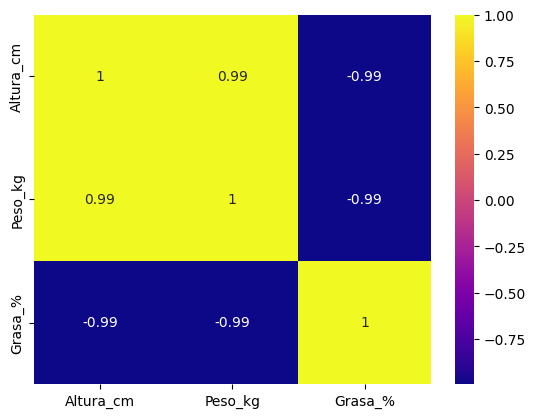

In [52]:
# Creamos un mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap="plasma") # cmap = Blues, Greens, rocket
plt.show()

# Material complementario

[Blog Kaggle sobre correlación](https://www.kaggle.com/code/mukeshchoudhary/correlation)